# Introduction
# Dataset
The dataset used for this project is derived from https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?couponCode=KEEPLEARNING. This is a lending club Data. It contains historical loan data, including borrower characteristics, loan information, and performance metrics. The dataset encompasses various features such as annual income, loan amounts, credit scores, and repayment history, enabling a comprehensive analysis of factors influencing loan defaults.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

## Loading the data and other imports needs for EDA

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

**EDA**

# First will check how our class is distributed

<Axes: xlabel='loan_status', ylabel='count'>

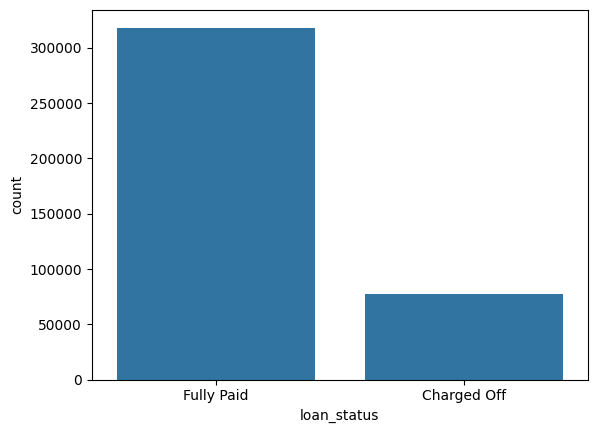

In [36]:
sns.countplot(x = "loan_status",data = df)

we can clearly see a class imbalance
later we might need to fix the class imbalance in model developement¶

In [37]:
# get the count
df["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

# lets check relationship with all other numerical columns

In [38]:
df.select_dtypes(include = 'number').corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


# lets create a heatmap to visualize it better

<Axes: >

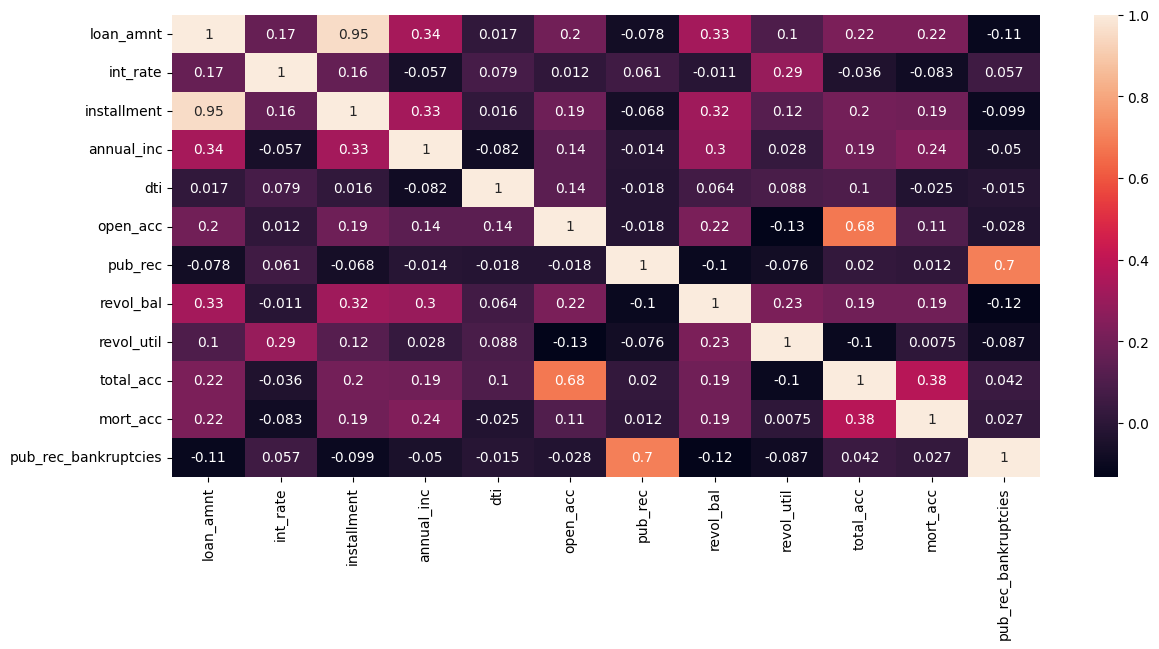

In [39]:
plt.figure(figsize= (14,6))
sns.heatmap(df.select_dtypes(include = ["number"]).corr(),annot = True)

# now we will explore the features where corelation is high

<Axes: xlabel='total_acc', ylabel='open_acc'>

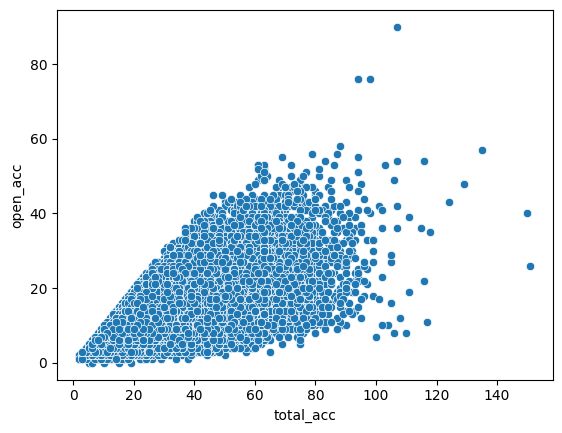

In [40]:
sns.scatterplot(x = "total_acc",y = "open_acc",data = df)

In [41]:
# lets explore with target class

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

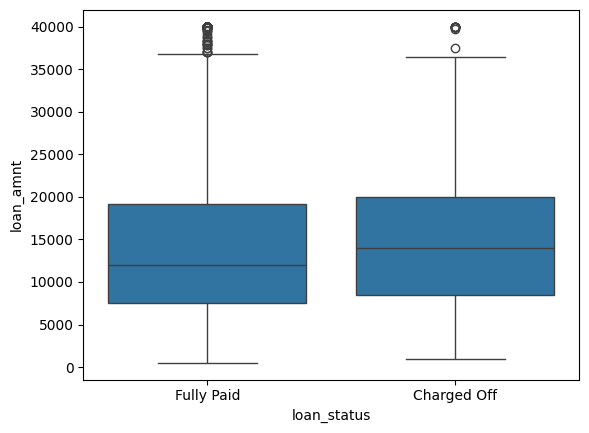

In [42]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

# we can see amount bit high for charged off loans
# lets explore loan amount with fully paid and charged off

In [43]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Text(0.5, 1.0, 'installment vs loan ammount')

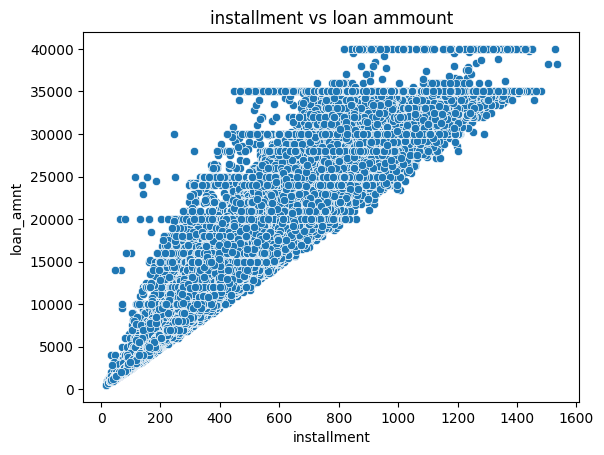

In [44]:
sns.scatterplot(x = "installment",y = "loan_amnt",data = df)
plt.title("installment vs loan ammount")

In [45]:
# its obvious that whenever ammount increase installment number increses

In [46]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [47]:
# lets explore with target class

<Axes: xlabel='home_ownership', ylabel='count'>

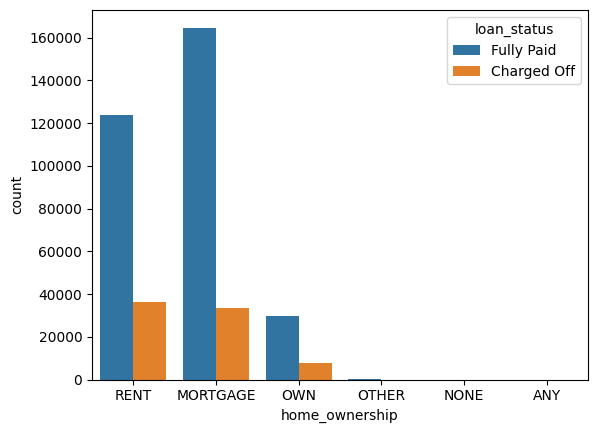

In [48]:
sns.countplot(x = "home_ownership",data = df, hue = "loan_status")

In [49]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [50]:
order_pass = sorted(df["grade"].unique())

<Axes: xlabel='grade', ylabel='count'>

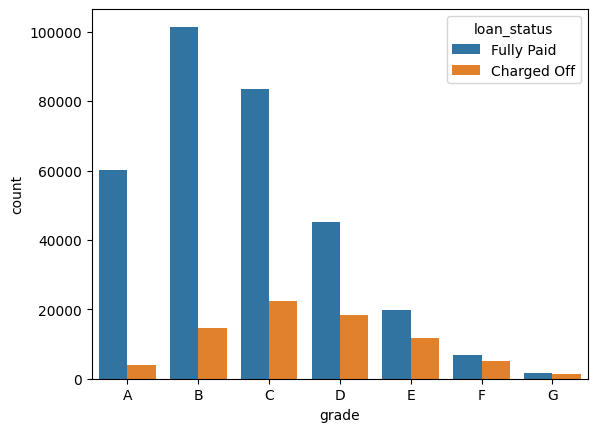

In [51]:
sns.countplot(x = "grade",data = df,order =order_pass,hue = "loan_status")


<Axes: xlabel='sub_grade', ylabel='count'>

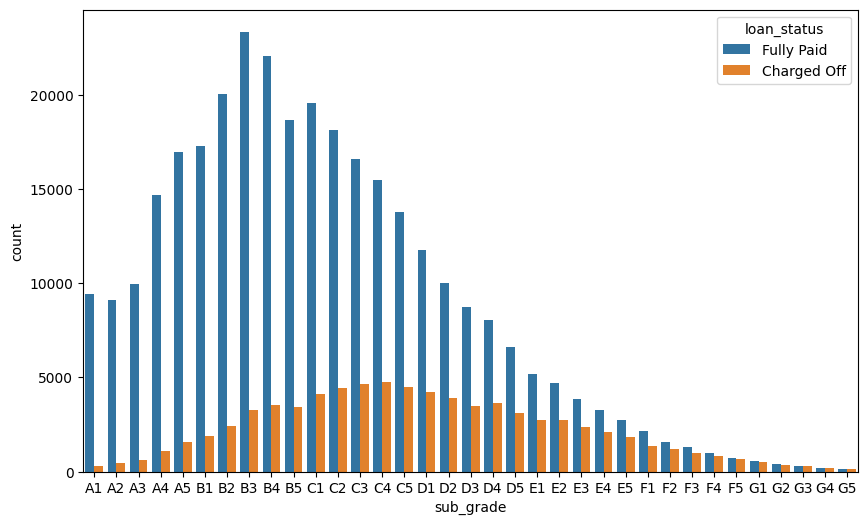

In [52]:
plt.figure(figsize = (10,6))
order_pass = sorted(df["sub_grade"].unique())
sns.countplot(x = "sub_grade",data = df,order =order_pass,hue = "loan_status")

In [53]:
#lets convert our target class to numeric

In [54]:
df["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [55]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid" :1,"Charged Off":0})

In [56]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


## Data Preprocessing

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to 
decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

<Axes: >

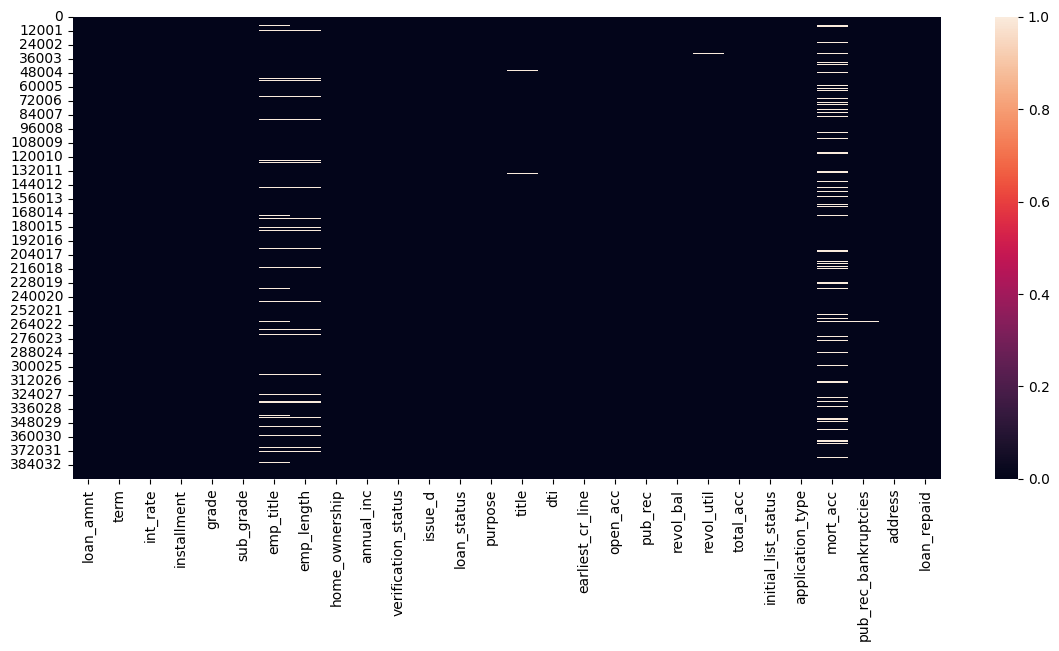

In [57]:
plt.figure(figsize= (14,6))
sns.heatmap(df.isnull())

In [58]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [59]:
# as we already created numerical column "loan_repaid" we need to drop loan_status

In [60]:
df.drop("loan_status",axis =1,inplace = True)

In [61]:
# How many unique employment job titles are there?

In [62]:
df['emp_title'].value_counts()

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Social Work/Care Manager           1
Regional Counsel                   1
Nor-Com Inc                        1
Director of the Bach Society       1
SPO II                             1
Name: count, Length: 173105, dtype: int64

In [63]:
df.drop("emp_title",axis =1, inplace = True)

In [64]:
# 173105 different nos. of title, practically its not useful to convert them into dumy variable

In [66]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [67]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [68]:
df["emp_length"] = df["emp_length"].map({"< 1 year" : 0.5,"1 year":1,'2 years':2, '3 years':3,"4 years":4,"5 years":5,"6 years":6,"7 years":7,"8 years":8,"9 years":9,
"10+ years":10.5})

In [69]:
df["emp_length"].value_counts()

emp_length
10.5    126041
2.0      35827
0.5      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

In [70]:
len(df)

396030

In [71]:
# lets check 18301 nan value in emp_length, as minor class count is less, lets check how many nan are in charged off

In [72]:
# Count NaN in emp_length for loan_repaid=0
df[df['loan_repaid'] == 0]['emp_length'].isna().sum()

np.int64(5038)

In [73]:
# lets not drop the na , as almost 6.5% are charged off

In [74]:
df["emp_length"] = df["emp_length"].fillna(df["emp_length"].median())

In [75]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [76]:
df["title"].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [77]:
df["title"].value_counts()

title
Debt consolidation                       152472
Credit card refinancing                   51487
Home improvement                          15264
Other                                     12930
Debt Consolidation                        11608
                                          ...  
Outboard Motor Repower Loan                   1
2011 Insurance and Debt Consolidation         1
Credit buster                                 1
Loanforpayoff                                 1
Toxic Debt Payoff                             1
Name: count, Length: 48816, dtype: int64

In [78]:
#lets drop this

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1484976416.py, line 1)

In [79]:
df.drop("title",axis =1 , inplace = True)

In [80]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [81]:
df["revol_util"].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

In [82]:
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())

In [83]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [84]:
sorted(df["mort_acc"].unique())

[np.float64(0.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(nan),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(10.0),
 np.float64(11.0),
 np.float64(12.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(15.0),
 np.float64(16.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(19.0),
 np.float64(20.0),
 np.float64(21.0),
 np.float64(22.0),
 np.float64(23.0),
 np.float64(24.0),
 np.float64(25.0),
 np.float64(26.0),
 np.float64(27.0),
 np.float64(28.0),
 np.float64(30.0),
 np.float64(31.0),
 np.float64(32.0),
 np.float64(34.0)]

In [85]:
# Count NaN in emp_length for loan_repaid=0
df[df['loan_repaid'] == 0]['mort_acc'].isna().sum()

np.int64(5550)

In [86]:
df["mort_acc"] = df["mort_acc"].fillna(df["mort_acc"].median())

In [87]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [88]:
# Count NaN in emp_length for loan_repaid=0
df[df['loan_repaid'] == 0]['pub_rec_bankruptcies'].isna().sum()

np.int64(87)

In [89]:
df.select_dtypes(include = "number").corr()["pub_rec_bankruptcies"].sort_values()

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086753
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
loan_repaid            -0.009383
mort_acc                0.035089
emp_length              0.036594
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [90]:
df[["pub_rec","pub_rec_bankruptcies"]].head(20)

,pub_rec,pub_rec_bankruptcies
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [91]:
same_value_count = (df['pub_rec'] == df['pub_rec_bankruptcies']).sum()
print(f"Rows where pub_rec equals pub_rec_bankruptcies: {same_value_count}")

Rows where pub_rec equals pub_rec_bankruptcies: 380095


In [92]:
# as the c
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec'])

In [93]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## My Df is free of Nan Value Now

In [94]:
# Lets do dummy variable setup

In [95]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10.5,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4.0,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,0.5,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6.0,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9.0,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [96]:


df["term"] = df["term"].map({' 36 months':36,' 60 months':60})

In [97]:
df["term"].unique()

array([36, 60])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [99]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,10.5,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,4.0,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,0.5,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,6.0,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,9.0,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# We already know grade is part of sub_grade, so just drop the grade feature

In [100]:
df = df.drop('grade',axis=1)

In [101]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [102]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [103]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [104]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            396030 non-null  float64
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [106]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [107]:
df["home_ownership"] = df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [108]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [109]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [110]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [111]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [114]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [115]:
df["issue_d"].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [116]:
# in theory we wouldn't have an issue_date, drop this feature.

In [117]:
df = df.drop('issue_d',axis=1)

In [119]:
# extract year that can be useful

In [120]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [121]:
df["address"].head(20)

0          0174 Michelle Gateway\nMendozaberg, OK 22690
1       1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2       87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                 823 Reid Ford\nDelacruzside, MA 00813
4                  679 Luna Roads\nGreggshire, VA 11650
5     1726 Cooper Passage Suite 129\nNorth Deniseber...
6     1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                             USCGC Nunez\nFPO AE 30723
8                              USCGC Tran\nFPO AP 22690
9                  3390 Luis Rue\nMauricestad, VA 00813
10            40245 Cody Drives\nBartlettfort, NM 00813
11     3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12       4173 David Extension\nWest Beckyfort, MS 70466
13             3343 Wells Mews\nShellychester, OR 29597
14    0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15     11629 Sean Hills Suite 614\nStevenfort, HI 30723
16    407 Briggs Lodge Suite 778\nWest Aprilborough,...
17    487 Jennifer Parkway Suite 940\nCummingssh

In [122]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [123]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   emp_length                           396030 non-null  float64
 5   annual_inc                           396030 non-null  float64
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  revol_util                           396030 non-null  float64
 11  total_acc    

In [128]:
# Select columns with boolean dtype
bool_cols = df.select_dtypes(include='bool').columns

# Convert boolean columns to int (True -> 1, False -> 0)
df[bool_cols] = df[bool_cols].astype(int)

In [129]:
bool_cols = df.select_dtypes(include='bool').columns

In [130]:
bool_cols

Index([], dtype='object')

In [131]:
df[bool_cols] = df[bool_cols].astype(int)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   emp_length                           396030 non-null  float64
 5   annual_inc                           396030 non-null  float64
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  revol_util                           396030 non-null  float64
 11  total_acc    

In [133]:
## there is high corelation bw installment and loan amnt , and both having low corelation with target, lets drop installment

In [135]:
df.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,earliest_cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
loan_amnt,1.000000,0.393862,0.168921,0.953929,0.099677,0.336887,0.016636,0.198556,-0.077779,0.328320,...,-0.147003,-0.011620,0.019653,-0.000658,-0.010556,-0.000254,0.000953,0.001021,0.019599,0.021638
term,0.393862,1.000000,0.434594,0.153378,0.060553,0.060330,0.036508,0.079575,-0.018758,0.084787,...,-0.029011,-0.031168,0.058168,-0.000179,-0.029256,-0.001291,0.000942,0.003765,0.062306,0.055373
int_rate,0.168921,0.434594,1.000000,0.162758,0.011718,-0.056771,0.079038,0.011649,0.060986,-0.011280,...,0.108470,-0.045131,0.086701,-0.001254,-0.042415,0.000633,0.000585,0.001037,0.085311,0.083259
installment,0.953929,0.153378,0.162758,1.000000,0.088124,0.330381,0.015786,0.188973,-0.067892,0.316455,...,-0.131848,-0.008217,0.013924,-0.000797,-0.007988,0.000112,0.000805,0.000032,0.012558,0.016232
emp_length,0.099677,0.060553,0.011718,0.088124,1.000000,0.068288,0.018106,0.043564,0.035592,0.088425,...,-0.210834,0.004046,-0.003459,-0.001090,0.001941,-0.001986,-0.000089,0.001285,-0.006788,-0.000731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30723,-0.000254,-0.001291,0.000633,0.000112,-0.001986,0.001275,0.003838,0.003090,0.001211,-0.000702,...,0.002100,-0.146861,-0.069708,-0.166532,-0.146987,1.000000,-0.165482,-0.167318,-0.068921,-0.069468
48052,0.000953,0.000942,0.000585,0.000805,-0.000089,-0.000320,-0.000965,0.000686,-0.002103,0.001480,...,0.000395,-0.145906,-0.069255,-0.165450,-0.146032,-0.165482,1.000000,-0.166231,-0.068474,-0.069017
70466,0.001021,0.003765,0.001037,0.000032,0.001285,-0.000477,-0.000852,-0.002147,-0.000993,-0.002238,...,0.001402,-0.147525,-0.070024,-0.167285,-0.147652,-0.167318,-0.166231,1.000000,-0.069233,-0.069782
86630,0.019599,0.062306,0.085311,0.012558,-0.006788,-0.019129,0.020687,0.009621,0.004848,-0.001981,...,0.012874,-0.060768,-0.028844,-0.068908,-0.060820,-0.068921,-0.068474,-0.069233,1.000000,-0.028745


In [136]:
df = df.drop('installment',axis=1)

In [137]:
df.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,earliest_cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,10.5,117000.0,26.24,16.0,0.0,36369.0,41.8,...,1990,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,0.0,20131.0,53.3,...,2004,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,0.5,43057.0,12.79,13.0,0.0,11987.0,92.2,...,2007,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,0.0,5472.0,21.5,...,2006,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,0.0,24584.0,69.8,...,1999,0,1,0,0,0,0,0,0,0


In [ ]:
df.to_pickle("cleaned_data.pkl")